<a href="https://colab.research.google.com/github/juccaicedoac03/Numeric_methods_and_Optimization_Course/blob/main/1_Ra%C3%ADces_de_funciones/3_Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Newton-Raphson

**Background:** 

los *métodos abiertos* descritos a continuación se basan en fórmulas que requieren únicamente de un solo valor de inicio $x$ o que empiecen con un par de ellos, pero que no necesariamente encierran la raíz. Éstos, algunas veces **divergen** o se alejan de la raíz verdadera a medida que se avanza en el cálculo. Sin embargo, cuando los métodos abiertos **convergen**, en general lo hacen mucho más rápido que los métodos cerrados.

\\

**Clave:** 

Asumiendo que el valor inicial para la raíz es $x_i$, entonces se puede trazar una tangente desde el punto $[xi_i, f(x_i)]$ de la curva, y el punto donde esta *tangente* cruza al eje x representa una aproximación mejorada de la raíz.

\\

<img src="https://github.com/juccaicedoac03/Numeric_methods_and_Optimization_Course/blob/main/1_Ra%C3%ADces_de_funciones/Figs/newton.png?raw=true:, width=100" alt="find roots" width=400>

\\
Sabemos que la primera derivada de $x$ corresponde a la pendiente así: 

$$ f'(x_{i}) = \frac{f(x_{i}) - 0}{x_{i} - x_{i+1}}$$

De donde obtenemos la **fórmula de Newton-Raphson**: 

\\
$$ x_{i+1} = x_{i} - \frac{f(x_{i})}{f'(x_{i})} $$

\\
El valor de $x_r$ calculado con la ecuación, reemplazará, después, a cualquiera de los dos valores iniciales, $x_l$ o $x_u$, y da un valor de la función con el mismo signo de $f(x_r)$. De esta manera, los valores $x_l$ y $x_u$ siempre encierran la verdadera raíz. 


\\
**Solución:** 

El algoritmo onsta de un ciclo que calcula en forma iterativa nuevas aproximaciones hasta satisfacer el criterio de terminación $\epsilon_a$.

$$ \epsilon_a = \bigg| \frac{x_{i+1}-x{i}}{x_{i+1}} \bigg| \cdot 100\% $$

\\
**Ejercicio:** Demuestre que el error es igual a: 

$$ E_{t,i+1} = \frac{-f''(x_{r})}{2f'(x_{r})}E_{t,i}^{2}$$

\\
**Desventajas:** 

Aunque en general el método de Newton-Raphson es muy eficiente, hay situaciones donde se comporta de manera contraria. Por ejemplo en el caso especial de raíces múltiples y en algunos casos em los que se desea encontrar raíces simples como por ejemlo en: $f(x) = x^{10} - 1$

Algunos ejemplos de convergencia deficiente

\\

<img src="https://github.com/juccaicedoac03/Numeric_methods_and_Optimization_Course/blob/main/1_Ra%C3%ADces_de_funciones/Figs/div.png?raw=true:, width=100" alt="find roots" width=400>

\\
*En el código:* 

1. Se debe calcular la primera derivada mediante una función.

2. Al final de los cálculos, se necesitará sustituir siempre la raíz final calculada en la
función original, para determinar si el resultado se acerca a cero. Esta prueba protege el desarrollo del programa contra aquellos casos en los que se presenta convergencia lenta u oscilatoria, la cual puede llevar a valores pequeños de $\epsilon_a$, mientras que la solución aún está muy lejos de una raíz.

3. El programa deberá incluir siempre un límite máximo permitido del número de iteraciones para estar prevenidos contra soluciones oscilantes, de lenta convergencia o divergentes que podrían persistir en forma interminable.

4. El programa deberá alertar al usuario para que tome en cuenta la posibilidad de que $f'(x)$ sea igual a cero en cualquier momento durante el cálculo.

# Algoritmo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def fn(x): # Creamos la función 
    return np.exp(-x)-x

In [8]:
def dfn1(x):
    return -np.exp(-x)-1

In [6]:
X = np.arange(0,1,0.05)

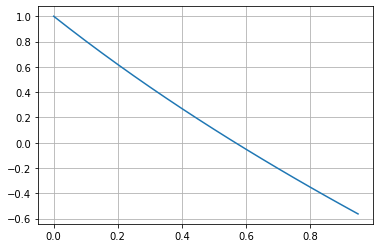

In [7]:
plt.plot(X,fn(X))
#plt.xlim([-0.1,1.5])
#plt.ylim([-2,15])
plt.grid(True)
plt.show()

In [10]:
def gn(x,f,df):
    return x-(f(x)/df(x))

In [22]:
# parámetros iniciales

x0 = 0

es = 1e-8
imax = 15

# algoritmo iterativo

ea = 100

iter = 0

xr = x0

print('Iter: {}  x_r: {}  E_a: {}'.format(iter , np.round(xr,5), np.round(ea,5)))

while (ea > es) and (iter <= imax):

    xrold = xr
    xr = gn(xr,fn,dfn1)

    iter += 1
    
    if xr != 0:
        ea = abs((xr-xrold)/xr) * 100
    

    print('Iter: {}  x_r: {}  E_a: {}'.format(iter , np.round(xr,5), np.round(ea,5)))


Iter: 0  x_r: 0  E_a: 100
Iter: 1  x_r: 0.5  E_a: 100.0
Iter: 2  x_r: 0.56631  E_a: 11.70929
Iter: 3  x_r: 0.56714  E_a: 0.14673
Iter: 4  x_r: 0.56714  E_a: 2e-05
Iter: 5  x_r: 0.56714  E_a: 0.0


**Ejercicio:** Crear una función que encuentre las raíz de una función a través del método de Newton-Raphson. La función debe cumplir las especificaciones anteriormente mencionadas.

**Ejercicio:** Usar la función creada anteriormente para encontrar la raíz de la función $f(x) = x^{10} - 1$ y decir que se puede concluir.